# import

In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

# دریافت اطلاعات

In [310]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [311]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [312]:
cdf = df [['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


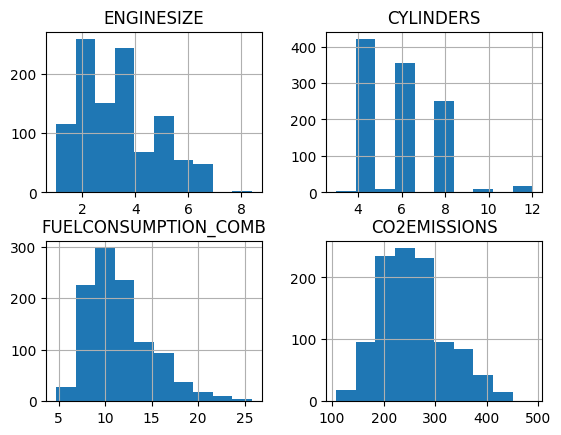

In [313]:
# viz = cdf [['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz = cdf
viz.hist()
plt.show()

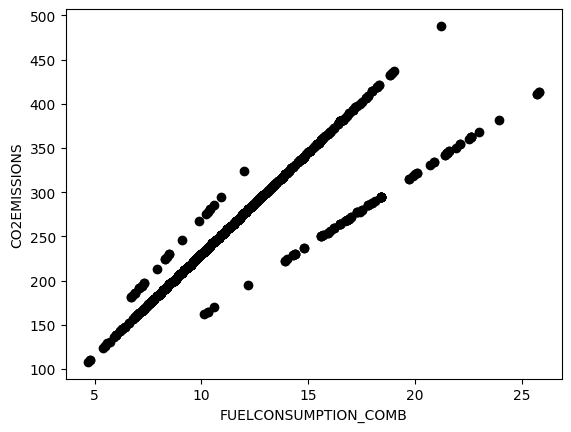

In [314]:
plt.scatter(cdf.FUELCONSUMPTION_COMB , cdf.CO2EMISSIONS , color = 'black')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

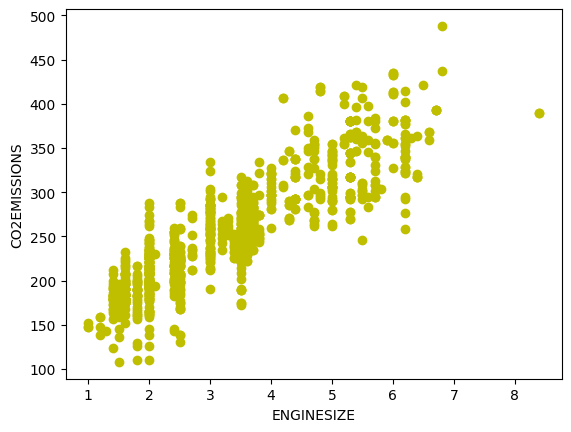

In [315]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color = 'y')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

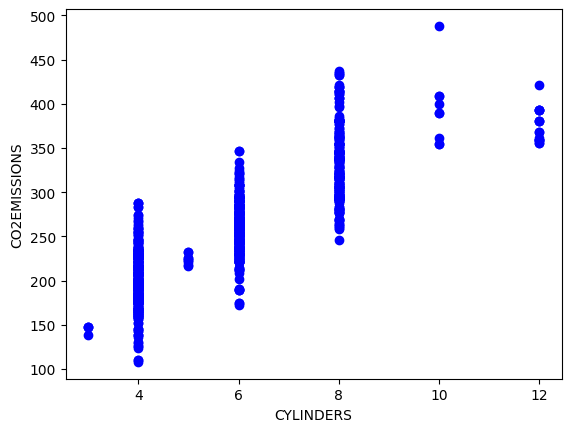

In [316]:
plt.scatter(cdf.CYLINDERS , cdf.CO2EMISSIONS,color = 'b')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [317]:
msk = np.random.rand(len(df)) < 0.8
train80 = df[msk]
test20 = df[~msk]

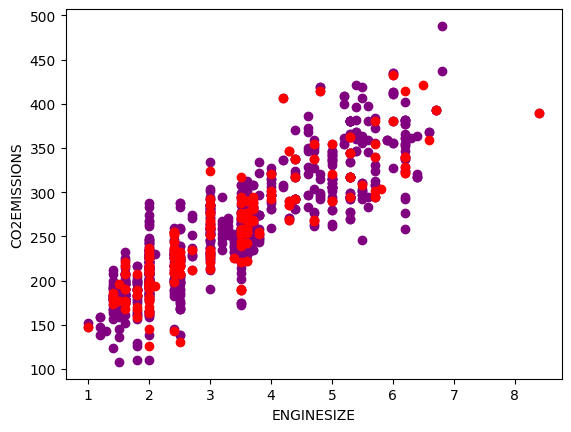

In [318]:
plt.scatter(train80.ENGINESIZE , train80.CO2EMISSIONS , color = "purple")
plt.scatter(test20.ENGINESIZE , test20.CO2EMISSIONS , color = "r")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

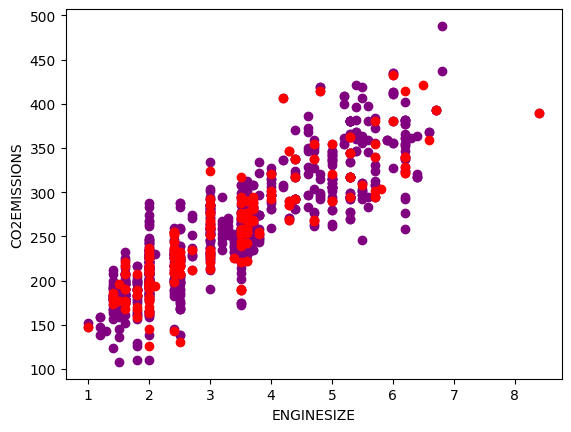

In [319]:
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.scatter(train80.ENGINESIZE , train80.CO2EMISSIONS , color = "purple")
ax1.scatter(test20.ENGINESIZE , test20.CO2EMISSIONS , color = "r")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [320]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train80[['ENGINESIZE']])
train_y = np.asanyarray(train80[['CO2EMISSIONS']])
regr.fit(train_x,train_y)

print("Coefficients:  ",regr.coef_)
print("Intercept:  ",regr.intercept_)

Coefficients:   [[39.10714268]]
Intercept:   [125.63695959]


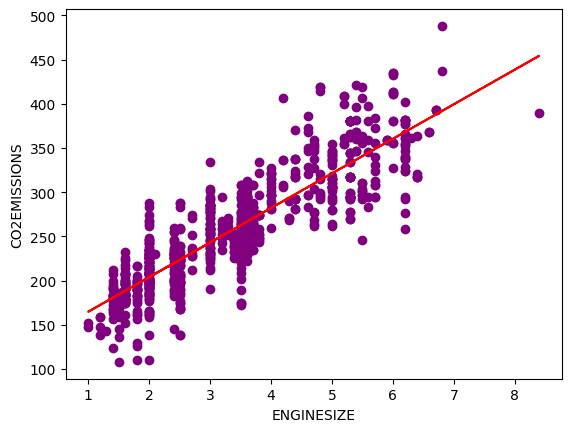

In [321]:
plt.scatter(train80.ENGINESIZE,train80.CO2EMISSIONS,color = 'purple')
plt.plot(train_x , regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')

plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

plt.show()

In [322]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test20[["ENGINESIZE"]])
test_y = np.asanyarray(test20[["CO2EMISSIONS"]])
test_y_ = regr.predict(test_x)

print("R2:  %.2f" % r2_score(test_y,test_y_))
# print(regr.predict([[4.2]]))

R2:  0.76
